In [19]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import clustering as cl
import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


## Load Pickel file from archetype_analysis.ipynb

In [20]:
df_teams_aa = pd.read_pickle("./pickle_files/df_teams_only_aa.pkl")

## Load match related data

In [21]:
df_matches_20_21 = pd.read_csv("top_leagues_teams_stats/germany-bundesliga-matches-2020-to-2021-stats.csv")
df_matches_19_20 = pd.read_csv("germany_match_stats/germany-bundesliga-matches-2019-to-2020-stats.csv")
df_matches_18_19 = pd.read_csv("germany_match_stats/germany-bundesliga-matches-2018-to-2019-stats.csv")
df_matches_17_18 = pd.read_csv("germany_match_stats/germany-bundesliga-matches-2017-to-2018-stats.csv")
df_matches_16_17 = pd.read_csv("germany_match_stats/germany-bundesliga-matches-2016-to-2017-stats.csv")

In [22]:
df_all = pd.concat([
                    df_matches_20_21,
                    df_matches_19_20, 
                    df_matches_18_19, 
                    df_matches_17_18, 
                    df_matches_16_17],sort=False)
df_all = df_all[df_all['status'] != 'suspended']

In [23]:
df_all.sort_values('timestamp', inplace=True)
df_all.reset_index(inplace=True)
df_all.drop('index', axis=1, inplace=True)

In [24]:
df_all[df_all['status']=='complete'].tail()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,...,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
1219,1593264600,Jun 27 2020 - 1:30pm,complete,0.0,Wolfsburg,Bayern München,Patrick Ittrich,1.19,2.38,1.12,...,4.45,4.60,1.65,1.08,1.31,1.80,2.8,1.36,2.85,VOLKSWAGEN ARENA (Wolfsburg)
1220,1593264600,Jun 27 2020 - 1:30pm,complete,0.0,Eintracht Frankfurt,Paderborn,Benjamin Brand,1.56,0.75,1.65,...,1.31,5.85,8.50,1.07,1.28,1.71,2.6,1.53,2.35,Deutsche Bank Park (Frankfurt am Main)
1221,1593264600,Jun 27 2020 - 1:30pm,complete,0.0,Werder Bremen,Köln,Bastian Dankert,0.38,0.88,0.53,...,1.57,4.60,5.00,1.11,1.38,2.00,3.2,1.47,2.50,wohninvest WESERSTADION (Bremen)
1222,1593264600,Jun 27 2020 - 1:30pm,complete,0.0,Freiburg,Schalke 04,Martin Petersen,1.63,1.06,1.71,...,2.00,3.65,3.55,1.18,1.59,2.50,4.4,1.51,2.35,Schwarzwald-Stadion (Freiburg im Breisgau)
1223,1593264600,Jun 27 2020 - 1:30pm,complete,0.0,Union Berlin,Fortuna Düsseldorf,Harm Osmers,1.50,0.75,1.59,...,3.65,3.35,2.10,1.26,1.83,3.15,5.9,1.67,2.05,Stadion An der Alten Försterei (Berlin)


In [25]:
df_all.to_excel('test.xlsx')

In [26]:
df_all['attendance'][df_all['attendance'] < 0] = 0

In [27]:
from pandas.plotting import scatter_matrix

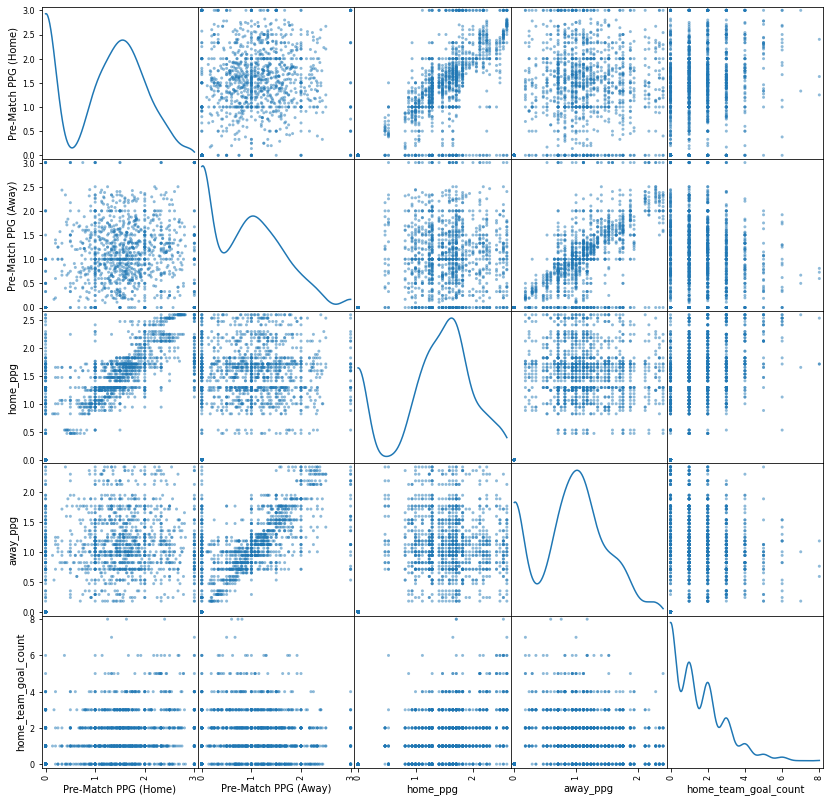

In [28]:
scatter_matrix(df_all[df_all.iloc[:,6:12].columns], diagonal='kde', figsize=(14,14));

## Append results from AA Analysis as features for home and away Team to match-related-dataset

In [29]:
# + 9 per match day
int_for_test = 1233
int_for_prediction = int_for_test - 9

In [30]:
columns=pd.Series(df_teams_aa.iloc[:,:-1].columns)
columns_h = list(columns.apply(lambda x: "ht_" + x))
columns_a = list(columns.apply(lambda x: "awt_" + x))

In [31]:
df_empty_columns = pd.DataFrame(columns=(columns_h + columns_a))
df_matches_with_aa = pd.concat([df_all,df_empty_columns], axis=1)

In [32]:
df_matches_with_aa_complete = df_matches_with_aa.copy()
df_matches_with_aa_complete = df_matches_with_aa_complete.iloc[:int_for_test,:]

In [33]:
#df_matches_with_aa_complete.to_excel('test.xlsx')

In [34]:
pre_cols = [col for col in df_matches_with_aa_complete.columns if 'pre' in col]
PRE_cols = [col for col in df_matches_with_aa_complete.columns if 'Pre' in col]
aa_cols_home = [col for col in df_matches_with_aa_complete.columns if 'ht_' in col]
aa_cols_away = [col for col in df_matches_with_aa_complete.columns if 'awt_' in col]

In [35]:
df_matches_with_aa_complete.tail()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,...,ht_0,ht_1,ht_2,ht_3,ht_4,awt_0,awt_1,awt_2,awt_3,awt_4
1228,1600522200,Sep 19 2020 - 1:30pm,incomplete,NaN,Stuttgart,Freiburg,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1229,1600522200,Sep 19 2020 - 1:30pm,incomplete,NaN,Union Berlin,Augsburg,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1230,1600533000,Sep 19 2020 - 4:30pm,incomplete,NaN,Borussia Dortmund,Borussia M'gladbach,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1231,1600608600,Sep 20 2020 - 1:30pm,incomplete,NaN,RB Leipzig,Mainz 05,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,1600617600,Sep 20 2020 - 4:00pm,incomplete,NaN,Wolfsburg,Bayer Leverkusen,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#AUFSTEIGER NICHT BEI AA DABEI

In [37]:
for index, row in df_matches_with_aa_complete.iterrows():
    teams_aa_score_home = list(df_teams_aa[df_teams_aa['common_name']==row['home_team_name']].iloc[:,:-1].iloc[0])
    teams_aa_score_away = list(df_teams_aa[df_teams_aa['common_name']==row['away_team_name']].iloc[:,:-1].iloc[0])
    print(teams_aa_score_away)
    df_matches_with_aa_complete.at[index, aa_cols_home] = teams_aa_score_home
    df_matches_with_aa_complete.at[index, aa_cols_away] = teams_aa_score_away 

[0.0, 0.4525802879291251, 0.5473754152823921, 4.429678848283499e-05, 0.0]
[0.17331118493909195, 0.45913621262458437, 0.3675083056478403, 4.429678848283499e-05, 0.0]
[0.0, 0.8444518272425248, 0.0919379844961241, 0.06361018826135106, 0.0]
[0.0, 0.6232558139534882, 0.3767441860465115, 0.0, 0.0]
[0.04795127353266891, 0.5751716500553714, 0.2698560354374307, 4.429678848283499e-05, 0.10697674418604647]
[0.1349944629014396, 0.5601107419712071, 6.644518272425254e-05, 0.13105204872646734, 0.17377630121816154]
[1.0, 0.0, 0.0, 0.0, 0.0]
[0.47902547065337764, 0.0, 0.185359911406423, 4.429678848283499e-05, 0.3355703211517166]
[0.866755260243632, 0.0, 0.13162790697674415, 0.0016168327796234772, 0.0]
[0.4227685492801773, 0.0, 0.0, 0.5772314507198228, 0.0]
[0.6269324473975634, 0.37306755260243624, 0.0, 0.0, 0.0]
[0.19966777408637867, 0.6849169435215946, 0.11446290143964563, 0.0009523809523809525, 0.0]
[0.04336655592469546, 0.8715171650055371, 0.08507198228128465, 4.429678848283499e-05, 0.0]
[0.73306755

[0.0, 0.6171871539313405, 0.2811074197120708, 0.00042081949058693247, 0.1012846068660022]
[0.47902547065337764, 0.0, 0.185359911406423, 4.429678848283499e-05, 0.3355703211517166]
[0.19966777408637867, 0.6849169435215946, 0.11446290143964563, 0.0009523809523809525, 0.0]
[0.04336655592469546, 0.8715171650055371, 0.08507198228128465, 4.429678848283499e-05, 0.0]
[0.6269324473975634, 0.37306755260243624, 0.0, 0.0, 0.0]
[0.7330675526024363, 0.07455149501661121, 0.1922259136212624, 0.00015503875968992244, 0.0]
[0.4227685492801773, 0.0, 0.0, 0.5772314507198228, 0.0]
[0.0, 0.8444518272425248, 0.0919379844961241, 0.06361018826135106, 0.0]
[0.17331118493909195, 0.45913621262458437, 0.3675083056478403, 4.429678848283499e-05, 0.0]
[0.1349944629014396, 0.5601107419712071, 6.644518272425254e-05, 0.13105204872646734, 0.17377630121816154]
[0.22910299003322263, 0.3219933554817276, 0.44885935769656693, 4.429678848283499e-05, 0.0]
[0.04795127353266891, 0.5751716500553714, 0.2698560354374307, 4.42967884828

[0.0, 0.6232558139534882, 0.3767441860465115, 0.0, 0.0]
[0.7330675526024363, 0.07455149501661121, 0.1922259136212624, 0.00015503875968992244, 0.0]
[0.04336655592469546, 0.8715171650055371, 0.08507198228128465, 4.429678848283499e-05, 0.0]
[0.0, 0.8444518272425248, 0.0919379844961241, 0.06361018826135106, 0.0]
[0.47902547065337764, 0.0, 0.185359911406423, 4.429678848283499e-05, 0.3355703211517166]
[0.6269324473975634, 0.37306755260243624, 0.0, 0.0, 0.0]
[0.19966777408637867, 0.6849169435215946, 0.11446290143964563, 0.0009523809523809525, 0.0]
[0.4227685492801773, 0.0, 0.0, 0.5772314507198228, 0.0]
[0.0, 0.6171871539313405, 0.2811074197120708, 0.00042081949058693247, 0.1012846068660022]
[0.04795127353266891, 0.5751716500553714, 0.2698560354374307, 4.429678848283499e-05, 0.10697674418604647]
[0.43953488372093014, 0.0, 0.5604208194905866, 4.429678848283499e-05, 0.0]
[0.1349944629014396, 0.5601107419712071, 6.644518272425254e-05, 0.13105204872646734, 0.17377630121816154]
[0.22910299003322263

[0.6269324473975634, 0.37306755260243624, 0.0, 0.0, 0.0]
[0.0, 0.6171871539313405, 0.2811074197120708, 0.00042081949058693247, 0.1012846068660022]
[0.1349944629014396, 0.5601107419712071, 6.644518272425254e-05, 0.13105204872646734, 0.17377630121816154]
[0.19966777408637867, 0.6849169435215946, 0.11446290143964563, 0.0009523809523809525, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0]
[0.866755260243632, 0.0, 0.13162790697674415, 0.0016168327796234772, 0.0]
[0.22910299003322263, 0.3219933554817276, 0.44885935769656693, 4.429678848283499e-05, 0.0]
[0.47902547065337764, 0.0, 0.185359911406423, 4.429678848283499e-05, 0.3355703211517166]
[0.0, 0.4525802879291251, 0.5473754152823921, 4.429678848283499e-05, 0.0]
[0.0, 0.07825027685492802, 0.9217497231450719, 0.0, 0.0]
[0.17331118493909195, 0.45913621262458437, 0.3675083056478403, 4.429678848283499e-05, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.21942414174972316, 0.780575858250277, 0.0, 0.0]
[0.04795127353266891, 0.5751716500553714, 0.2698560354374307, 4.42967884

[0.47902547065337764, 0.0, 0.185359911406423, 4.429678848283499e-05, 0.3355703211517166]
[0.0, 0.6171871539313405, 0.2811074197120708, 0.00042081949058693247, 0.1012846068660022]
[0.04795127353266891, 0.5751716500553714, 0.2698560354374307, 4.429678848283499e-05, 0.10697674418604647]
[0.19966777408637867, 0.6849169435215946, 0.11446290143964563, 0.0009523809523809525, 0.0]
[0.22910299003322263, 0.3219933554817276, 0.44885935769656693, 4.429678848283499e-05, 0.0]
[0.0, 0.4525802879291251, 0.5473754152823921, 4.429678848283499e-05, 0.0]
[0.04336655592469546, 0.8715171650055371, 0.08507198228128465, 4.429678848283499e-05, 0.0]
[0.0, 0.21942414174972316, 0.780575858250277, 0.0, 0.0]
[0.43953488372093014, 0.0, 0.5604208194905866, 4.429678848283499e-05, 0.0]
[0.17331118493909195, 0.45913621262458437, 0.3675083056478403, 4.429678848283499e-05, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.07825027685492802, 0.9217497231450719, 0.0, 0.0]
[0.4227685492801773, 0.0, 0.0, 0.5772

[0.4227685492801773, 0.0, 0.0, 0.5772314507198228, 0.0]
[0.17331118493909195, 0.45913621262458437, 0.3675083056478403, 4.429678848283499e-05, 0.0]
[0.866755260243632, 0.0, 0.13162790697674415, 0.0016168327796234772, 0.0]
[0.04336655592469546, 0.8715171650055371, 0.08507198228128465, 4.429678848283499e-05, 0.0]
[0.22910299003322263, 0.3219933554817276, 0.44885935769656693, 4.429678848283499e-05, 0.0]
[0.43953488372093014, 0.0, 0.5604208194905866, 4.429678848283499e-05, 0.0]
[0.04795127353266891, 0.5751716500553714, 0.2698560354374307, 4.429678848283499e-05, 0.10697674418604647]
[1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.07991140642303436, 0.9200885935769655, 0.0, 0.0]
[0.0, 0.07825027685492802, 0.9217497231450719, 0.0, 0.0]
[0.7330675526024363, 0.07455149501661121, 0.1922259136212624, 0.00015503875968992244, 0.0]
[0.1349944629014396, 0.5601107419712071, 6.644518272425254e-05, 0.13105204872646734, 0.17377630121816154]
[0.4227685492801773, 0.0, 0.0, 0.5772314507198228, 0.0]
[0.17331118493909195, 0

[1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.21942414174972316, 0.780575858250277, 0.0, 0.0]
[0.22910299003322263, 0.3219933554817276, 0.44885935769656693, 4.429678848283499e-05, 0.0]
[0.7330675526024363, 0.07455149501661121, 0.1922259136212624, 0.00015503875968992244, 0.0]
[0.0, 0.07825027685492802, 0.9217497231450719, 0.0, 0.0]
[0.866755260243632, 0.0, 0.13162790697674415, 0.0016168327796234772, 0.0]
[0.866755260243632, 0.0, 0.13162790697674415, 0.0016168327796234772, 0.0]
[0.0, 0.4525802879291251, 0.5473754152823921, 4.429678848283499e-05, 0.0]
[0.1349944629014396, 0.5601107419712071, 6.644518272425254e-05, 0.13105204872646734, 0.17377630121816154]
[1.0, 0.0, 0.0, 0.0, 0.0]
[0.043588039867109636, 0.35942414174972326, 0.5969435215946847, 4.429678848283499e-05, 0.0]
[0.4227685492801773, 0.0, 0.0, 0.5772314507198228, 0.0]
[0.6269324473975634, 0.37306755260243624, 0.0, 0.0, 0.0]
[0.17331118493909195, 0.45913621262458437, 0.3675083056478403, 4.429678848283499e-05, 0.0]
[0.47902547065337764, 0.0, 0.

[0.6269324473975634, 0.37306755260243624, 0.0, 0.0, 0.0]
[0.17331118493909195, 0.45913621262458437, 0.3675083056478403, 4.429678848283499e-05, 0.0]
[0.0, 0.21942414174972316, 0.780575858250277, 0.0, 0.0]
[0.22910299003322263, 0.3219933554817276, 0.44885935769656693, 4.429678848283499e-05, 0.0]
[0.43953488372093014, 0.0, 0.5604208194905866, 4.429678848283499e-05, 0.0]
[0.0, 0.07991140642303436, 0.9200885935769655, 0.0, 0.0]
[0.7330675526024363, 0.07455149501661121, 0.1922259136212624, 0.00015503875968992244, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.07825027685492802, 0.9217497231450719, 0.0, 0.0]
[0.866755260243632, 0.0, 0.13162790697674415, 0.0016168327796234772, 0.0]
[0.04336655592469546, 0.8715171650055371, 0.08507198228128465, 4.429678848283499e-05, 0.0]
[0.22910299003322263, 0.3219933554817276, 0.44885935769656693, 4.429678848283499e-05, 0.0]
[0.015260243632336648, 0.3114950166112955, 0.6732004429678847, 4.429678848283499e-05, 0.0]
[0.19966777408637867, 0.68

[0.015260243632336648, 0.3114950166112955, 0.6732004429678847, 4.429678848283499e-05, 0.0]
[0.22910299003322263, 0.3219933554817276, 0.44885935769656693, 4.429678848283499e-05, 0.0]
[0.0, 0.9421262458471757, 0.05780730897009971, 6.644518272425254e-05, 0.0]
[0.0, 0.4525802879291251, 0.5473754152823921, 4.429678848283499e-05, 0.0]
[0.47902547065337764, 0.0, 0.185359911406423, 4.429678848283499e-05, 0.3355703211517166]
[1.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0]
[0.866755260243632, 0.0, 0.13162790697674415, 0.0016168327796234772, 0.0]
[0.6269324473975634, 0.37306755260243624, 0.0, 0.0, 0.0]
[0.7330675526024363, 0.07455149501661121, 0.1922259136212624, 0.00015503875968992244, 0.0]
[0.17331118493909195, 0.45913621262458437, 0.3675083056478403, 4.429678848283499e-05, 0.0]
[0.866755260243632, 0.0, 0.13162790697674415, 0.0016168327796234772, 0.0]
[0.043588039867109636, 0.35942414174972326, 0.5969435215946847, 4.429678848283499e-05, 0.0]
[0.43953488372093014, 0.0, 0.5604208194905866, 4.

[0.7330675526024363, 0.07455149501661121, 0.1922259136212624, 0.00015503875968992244, 0.0]
[0.43953488372093014, 0.0, 0.5604208194905866, 4.429678848283499e-05, 0.0]
[0.0, 0.4525802879291251, 0.5473754152823921, 4.429678848283499e-05, 0.0]
[0.043588039867109636, 0.35942414174972326, 0.5969435215946847, 4.429678848283499e-05, 0.0]
[0.0, 0.9421262458471757, 0.05780730897009971, 6.644518272425254e-05, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0]
[0.866755260243632, 0.0, 0.13162790697674415, 0.0016168327796234772, 0.0]
[0.7330675526024363, 0.07455149501661121, 0.1922259136212624, 0.00015503875968992244, 0.0]
[0.6269324473975634, 0.37306755260243624, 0.0, 0.0, 0.0]
[0.17331118493909195, 0.45913621262458437, 0.3675083056478403, 4.429678848283499e-05, 0.0]
[0.43953488372093014, 0.0, 0.5604208194905866, 4.429678848283499e-05, 0.0]
[0.015260243632336648, 0.3114950166112955, 0.6732004429678847, 4.429678848283499e-05, 0.0]
[0.4227685492801773, 0.0, 0.0, 0.5772314507198228, 0.0]
[0.04336655592469546, 0.87151716

IndexError: single positional indexer is out-of-bounds

In [ ]:
df_matches_with_aa_complete['HTGDIFF'] = df_matches_with_aa_complete['home_team_goal_count'] - df_matches_with_aa_complete['away_team_goal_count']
df_matches_with_aa_complete['ATGDIFF'] = df_matches_with_aa_complete['away_team_goal_count'] - df_matches_with_aa_complete['home_team_goal_count']

## Calculate AVG goal difference for home and away team rolling 10 Games

In [ ]:
def avg_goal_diff(df, avg_h_a_diff, a_h_team, a_h_goal_letter):
    """
    input: 
        df = dataframe with all results
        avg_h_a_diff = name of the new column
        a_h_team = HomeTeam or AwayTeam
        a_h_goal_letter = 'H' for home or 'A' for away
    output: 
        avg_per_team = dictionary with with team as key and columns as values with new column H/ATGDIFF
    """
    df[avg_h_a_diff] = 0
    avg_per_team = {}
    all_teams = df[a_h_team].unique()
    for t in all_teams:
        df_team = df[df[a_h_team]==t].fillna(0)
        result = df_team['{}TGDIFF'.format(a_h_goal_letter)].rolling(4).mean()
        df_team[avg_h_a_diff] = result
        avg_per_team[t] = df_team
    return avg_per_team

In [ ]:
d_AVGFTHG = avg_goal_diff(df_matches_with_aa_complete, 'AVGHTGDIFF', 'home_team_name', 'H')

In [ ]:
def from_dict_value_to_df(d):
    """
    input = dictionary 
    output = dataframe as part of all the values from the dictionary
    """
    df = pd.DataFrame()
    for v in d.values():
        df = df.append(v)
    return df

In [ ]:
df_AVGFTHG = from_dict_value_to_df(d_AVGFTHG)
df_AVGFTHG.sort_index(inplace=True)

In [ ]:
d_AVGFTAG = avg_goal_diff(df_AVGFTHG, 'AVGATGDIFF', 'away_team_name', 'A')
df_all = from_dict_value_to_df(d_AVGFTAG)
df_all.sort_index(inplace=True)
df_all['AVGATGDIFF'].fillna(0, inplace=True)

## Add per match game results from last three games

In [ ]:
df_all['goal_diff'] = df_all['home_team_goal_count'] - df_all['away_team_goal_count']

for index, row in df_all[df_all['status']=='complete'].iterrows():
    if df_all['goal_diff'][index] > 0:
        df_all.at[index,'result'] = 3
    elif df_all['goal_diff'][index] == 0:
        df_all.at[index,'result'] = 2
    else:
        df_all.at[index,'result'] = 1

In [ ]:
def previous_data(df, h_or_a_team, column, letter, past_n):
    """
    input: 
        df = dataframe with all results
        a_h_team = HomeTeam or AwayTeam
        column = column selected to get previous data from
    output:
        team_with_past_dict = dictionary with team as a key and columns as values with new 
                              columns with past value
    """
    d = dict()
    team_with_past_dict = dict()
    all_teams = df[h_or_a_team].unique()
    for team in all_teams:
        n_games = len(df[df[h_or_a_team]==team])
        team_with_past_dict[team] = df[df[h_or_a_team]==team]
        for i in range(1, past_n):
            d[i] = team_with_past_dict[team].assign(
                result=team_with_past_dict[team].groupby(h_or_a_team)[column].shift(i)
            ).fillna({'{}_X'.format(column): 0})
            team_with_past_dict[team]['{}_{}_{}'.format(letter, column, i)] = d[i].result
    return team_with_past_dict

In [ ]:
def previous_data_call(df, side, column, letter, iterations):
    d = previous_data(df, side, column, letter, iterations)
    df_result= from_dict_value_to_df(d)
    df_result.sort_index(inplace=True)
    return df_result

In [ ]:
df_last_home_results = previous_data_call(df_all, 'home_team_name', 'result', 'H', 3)
df_last_away_results = previous_data_call(df_last_home_results, 'away_team_name', 'result', 'A', 3)

In [ ]:
df_last_last_HTGDIFF_results = previous_data_call(df_last_away_results, 'home_team_name', 'HTGDIFF', 'H', 3)
df_last_last_ATGDIFF_results = previous_data_call(df_last_last_HTGDIFF_results, 'away_team_name', 'ATGDIFF', 'A', 3)

In [ ]:
df_last_AVGFTHG_results = previous_data_call(df_last_last_ATGDIFF_results, 'home_team_name', 'AVGHTGDIFF', 'H', 2)
df_last_AVGFTAG_results = previous_data_call(df_last_AVGFTHG_results, 'away_team_name', 'AVGATGDIFF', 'A', 2)

In [ ]:
df_all = df_last_AVGFTAG_results.copy()

In [ ]:
df_all.shape

In [ ]:
df_matches_with_aa_numeric = df_all._get_numeric_data()
df_matches_with_aa_numeric.drop(['timestamp', 'goal_diff', 'result', 'home_team_goal_count', 'away_team_goal_count'], axis=1, inplace=True)
df_matches_with_aa_numeric.isnull().sum(axis = 0)

In [ ]:
df_norm = (df_matches_with_aa_numeric - df_matches_with_aa_numeric.min()) / (df_matches_with_aa_numeric.max() - df_matches_with_aa_numeric.min())

In [ ]:
df_next_games = df_norm.iloc[int_for_prediction:,:]
a = df_next_games.loc[:, (df_next_games != 0).any(axis=0)]
a.dropna(axis=1,inplace=True)
a.drop(['HTGDIFF', 'ATGDIFF'], inplace=True, axis=1)

In [ ]:
df_next_games_teams = df_matches_with_aa_complete.iloc[int_for_prediction:,:][['home_team_name', 'away_team_name']]

In [ ]:
df_next_games_teams

In [ ]:
predictable_columns = [
       'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'attendance', 'home_ppg', 'away_ppg',
       'average_goals_per_match_pre_match', 'btts_percentage_pre_match',
       'over_15_percentage_pre_match', 'over_25_percentage_pre_match',
       'over_35_percentage_pre_match', 'over_45_percentage_pre_match',
       'over_15_HT_FHG_percentage_pre_match',
       'over_05_HT_FHG_percentage_pre_match',
       'average_corners_per_match_pre_match',
       'average_cards_per_match_pre_match', 'odds_ft_home_team_win',
       'odds_ft_draw', 'odds_ft_away_team_win', 'odds_ft_over15',
       'odds_ft_over25', 'odds_ft_over35', 'odds_ft_over45', 'odds_btts_yes',
       'odds_btts_no', 'ht_0', 'ht_1', 'ht_2', 'ht_3', 'ht_4', 'awt_0',
       'awt_1', 'awt_2', 'awt_3', 'awt_4', 'AVGHTGDIFF', 'AVGATGDIFF', 'H_result_1',
       'H_result_2', 'A_result_1', 'A_result_2', 'H_HTGDIFF_1', 'H_HTGDIFF_2',
       'A_ATGDIFF_1', 'A_ATGDIFF_2', 'H_AVGHTGDIFF_1', 'A_AVGATGDIFF_1'
]

In [ ]:
df_X = df_norm[predictable_columns]
#df_X.isnull().sum(axis = 0)

In [ ]:
df_X.fillna(0,inplace=True)

In [ ]:
X = df_X.iloc[:int_for_prediction,:]
Y = df_all.iloc[:int_for_prediction,:]['result']
Z = df_X.iloc[int_for_prediction:,:]

In [ ]:
X = X.iloc[17:,:]

In [ ]:
Y = Y[17:]

In [ ]:
X.to_pickle("pickle_files/X.pkl")
Y.to_pickle("pickle_files/Y.pkl")
Z.to_pickle("pickle_files/Z.pkl")
df_next_games_teams.to_pickle("pickle_files/next_games.pkl")